In [48]:
#importing the dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [49]:
#loading the dataset
df=pd.read_csv('/content/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**DATA** **PREPROCESSING** **AND** **DATA** **ANALYSIS**

In [50]:
#getting the shape of the data
df.shape

(1338, 7)

The above dataset has 1338 rows and 7 columns.

In [51]:
#checking the statistics
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [52]:
#checking for information regarding the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In the dataset we can see three categorical features. They are:

1.  sex
2.  smoker
3.  region







<ipython-input-53-605847e1a0f8>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


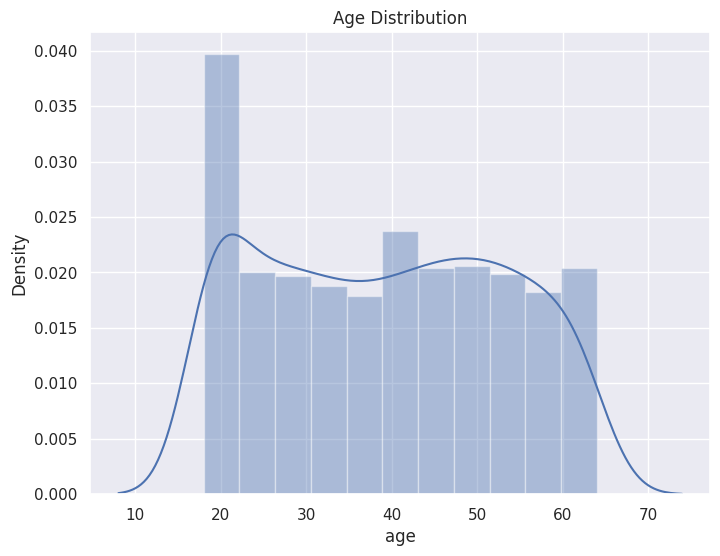

In [53]:
#distribution of age value
sns.set()
plt.figure(figsize=(8,6))
sns.distplot(df['age'])
plt.title('Age Distribution')
plt.show()

**Observation**:


*   The age column is normally distributed.





In [54]:
#value count of sex column
df.sex.value_counts()

,count
sex,
male,676
female,662


<ipython-input-55-59c200fcc23a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex',data=df,palette='viridis')


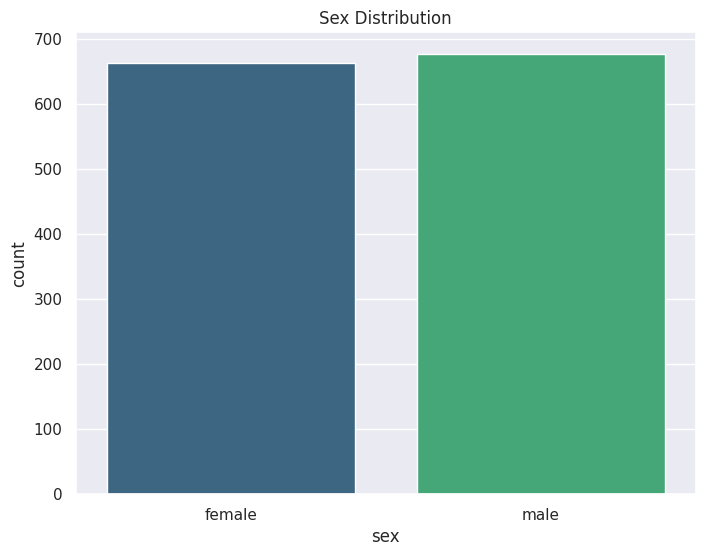

In [55]:
#checking the distribution of sex
plt.figure(figsize=(8,6))
sns.countplot(x='sex',data=df,palette='viridis')
plt.title('Sex Distribution')
plt.show()


Observations:

*  from the above plotting we can say the males and females are almost equally distributted.



In [56]:
#value count of smoker column
df.smoker.value_counts()

,count
smoker,
no,1064
yes,274


<ipython-input-57-ccec76ca3edc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='smoker',data=df,palette='magma')


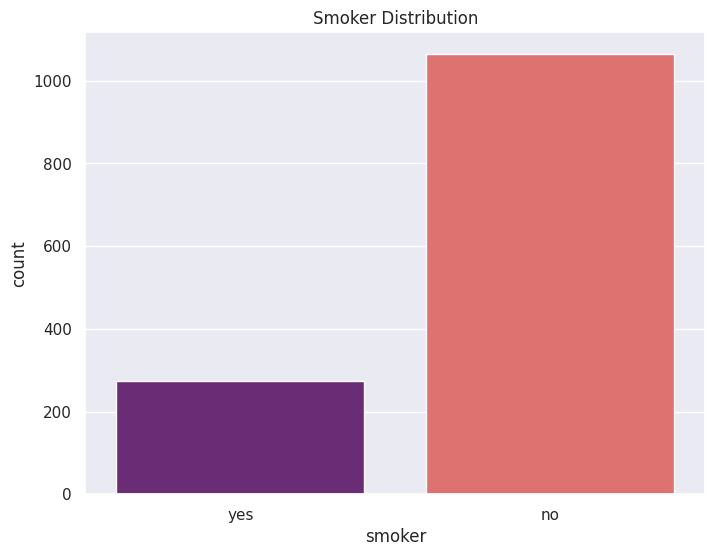

In [57]:
#checking the distribution of smoker column
plt.figure(figsize=(8,6))
sns.countplot(x='smoker',data=df,palette='magma')
plt.title('Smoker Distribution')
plt.show()

Observation:


* from the above plot we can see that most of people in the dataset are smokers.



<ipython-input-58-ecbaf4b438ad>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bmi'])


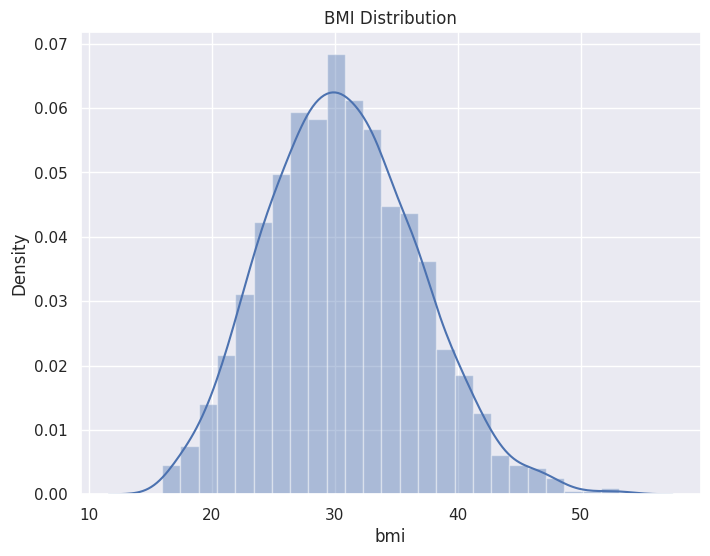

In [58]:
#checking the distribution of bmi
plt.figure(figsize=(8,6))
sns.distplot(df['bmi'])
plt.title('BMI Distribution')
plt.show()

**Observations**:


*   The BMI index follows a distribution which is symmetric about 30.


*   Normal BMI range is between 18.5 and 24.9.
*   Most of the people having BMI between 25 to 40 are considered to be obese.Obesity is a medical condition in which a person has excessive body fat.





In [59]:
#count distribution of children
df.children.value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


<ipython-input-60-d7941f73e55a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='children',data=df,palette='magma')


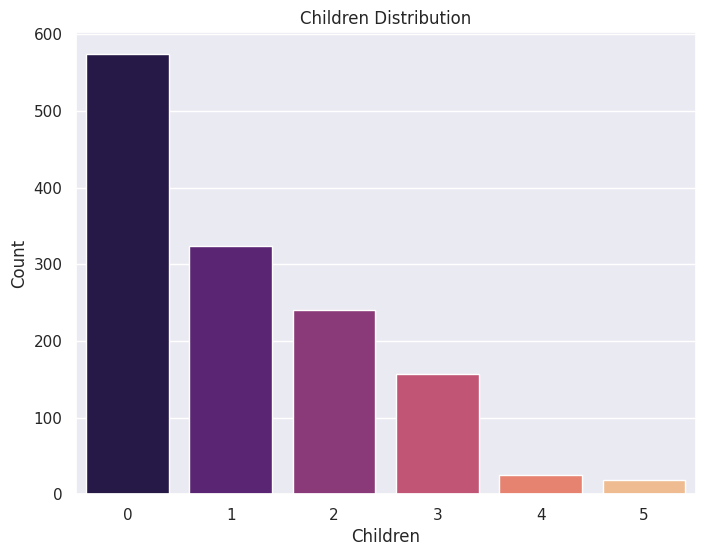

In [60]:
#checking the distribution of children
plt.figure(figsize=(8,6))
sns.countplot(x='children',data=df,palette='magma')
plt.xlabel('Children')
plt.ylabel('Count')
plt.title('Children Distribution')
plt.show()

**Observation:**


*  from the Graph we can clearly see that the most of the Patients have no children.



In [61]:
#count distribution of region
df.region.value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


<ipython-input-62-680d91ffc69d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='region',data=df,palette='magma')


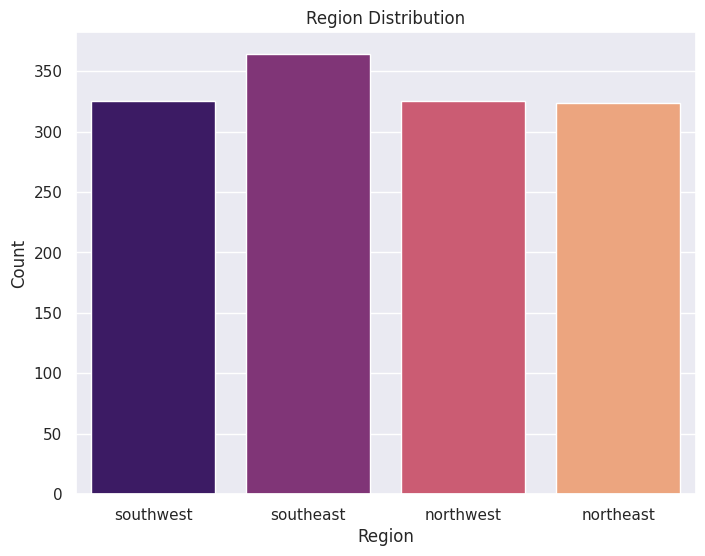

In [62]:
##checking the distribution of region
plt.figure(figsize=(8,6))
sns.countplot(x='region',data=df,palette='magma')
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Region Distribution')
plt.show()

**Observation**:

*   from the graph we can that the count of patients from Southeast is slightly higher than the other region, whereas number of patients from all the other regions are almost equal.




Text(0.5, 1.0, 'Smoker Count with respect to Children')

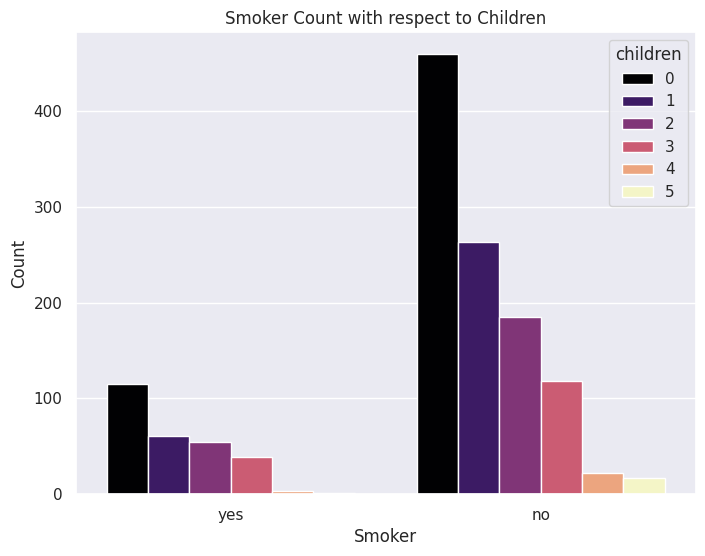

In [63]:
#checking the smoker count with respect to children count
plt.figure(figsize=(8,6))
sns.countplot(x='smoker',data=df,hue='children',palette='magma')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.title('Smoker Count with respect to Children')

<ipython-input-64-ea613214440a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['charges'])


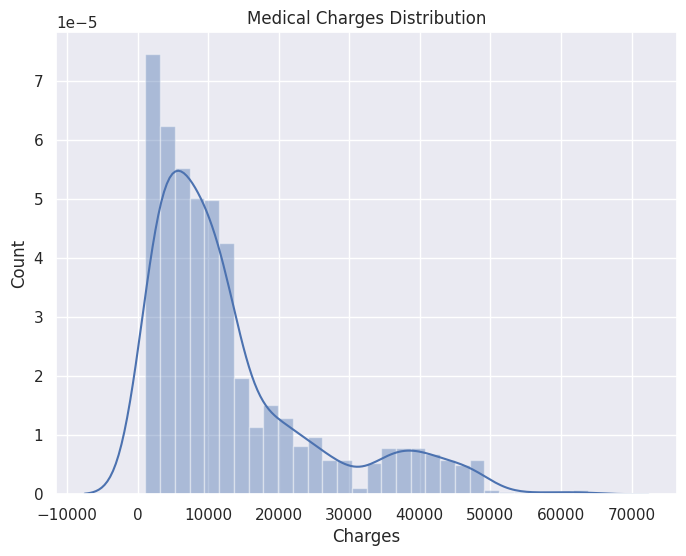

In [64]:
#checking the distribution of charges
plt.figure(figsize=(8,6))
sns.distplot(df['charges'])
plt.xlabel('Charges')
plt.ylabel('Count')
plt.title('Medical Charges Distribution')
plt.show()

**Observations:**


*  Medical Expanses of Most of the individuals is below 20000.
*  Very Few individuals have medical expanses above 50000.



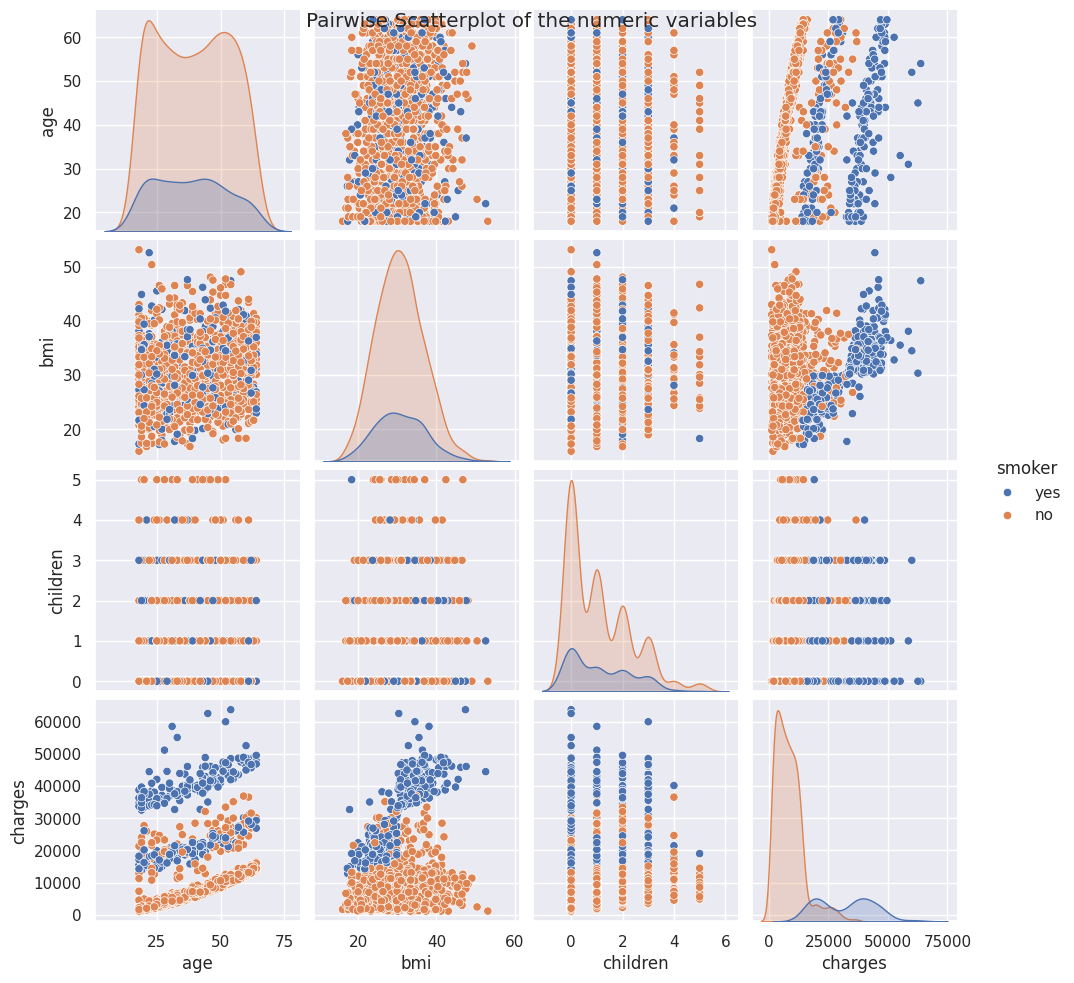

In [65]:
#Pairwise Scatterplot of thE numeric Variables
sns.pairplot(df, hue='smoker')
plt.suptitle('Pairwise Scatterplot of the numeric variables')
plt.show()

**Observations**:


*   Now,from Age vs. Charges graph, we can clearly see that the variation in charges with respect to age and smoking habits.The medical expenses of smokers is higher than that of non-smokers and the cost of treatment for non-smokers increases with age.But for smokers, the cost of treatment is high even for younger patients,which means the smokers are spending upon their smoking related illness as well as age related illness too.
*  From the BMI vs Charges graph we can say that smokers have higher medical expenses than Non-smokers irrespective of BMI.Most of the expenses for the Non-smokers are less thAN 20000.



**ENCODING THE CATEGORICAL FEATURES:**
Encoding the Categorical data is process of converting Categorical data into integer format so that the data with converted Categorical values can be provided to the models for better and improved predictions.

Here we will use LabelEncoder for converting the Categorical values into numerical Values.

In [66]:
#Coverting Categorical values into Numerical values using Label Encoder.
le=LabelEncoder()
df['sex']=le.fit_transform(df['sex'])
df['smoker']=le.fit_transform(df['smoker'])
df['region']=le.fit_transform(df['region'])

In [67]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


After using Label encoding we have encoded the sex,smoker and region columns.

*   we have encoded the sex variable as O for females and 1 for males.
*   for smoker column, we have encoded 0 as non-smoker and 1 as smoker.

*   for the region column, we have encoded 0 as 'northeast', 1 as 'northwest', 2 as 'southeast' & 3 as 'southwest'.






Text(0.5, 1.0, 'Smoker Count with respect to Gender')

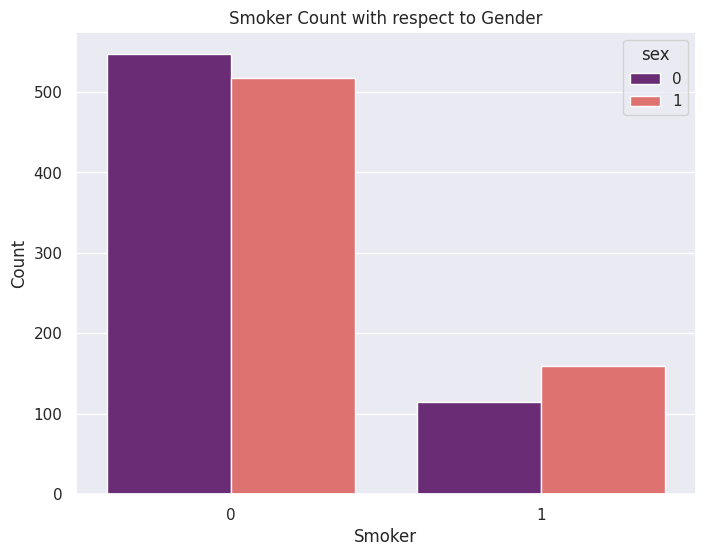

In [68]:
#checking the smoker count with gender
plt.figure(figsize=(8,6))
sns.countplot(x='smoker',data=df,hue='sex',palette='magma')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.title('Smoker Count with respect to Gender')

**Observations**:

*   from the graph we can see that most smokers are male and most non-smokers are females.
*  from this we can also assume that medical expenses will also be high for males than females.



Text(0, 0.5, 'Count')

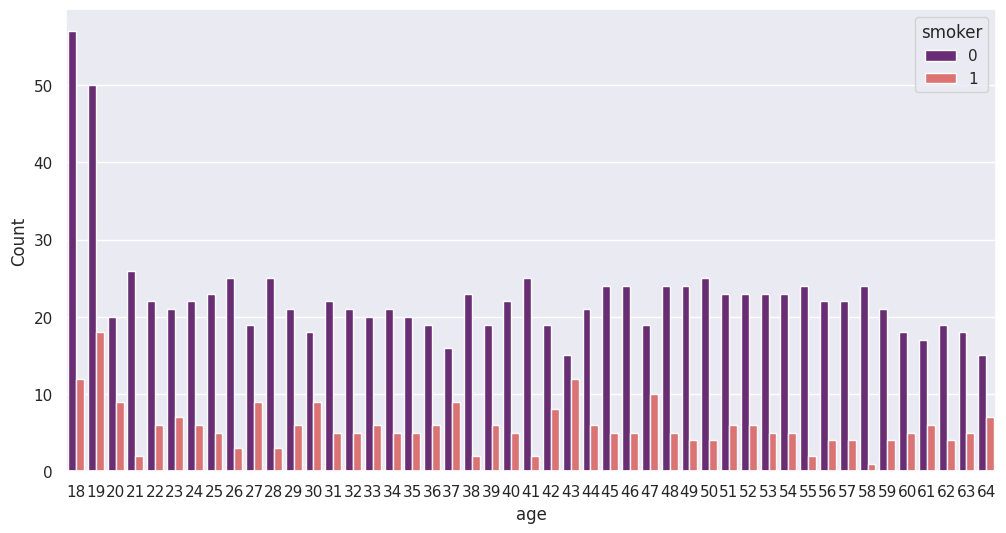

In [69]:
#smokers vs age distribution
plt.figure(figsize=(12,6))
sns.countplot(x='age',data=df,hue='smoker',palette='magma')
plt.xlabel('age')
plt.ylabel('Count')

**Observations**:


*  from the above graph we can clearly se that the most number of smokers are age of 19.



<ipython-input-70-ae9bfb1194ab>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='smoker',y='charges',data=df[df['age']==19],palette='magma')


Text(0, 0.5, 'Charges')

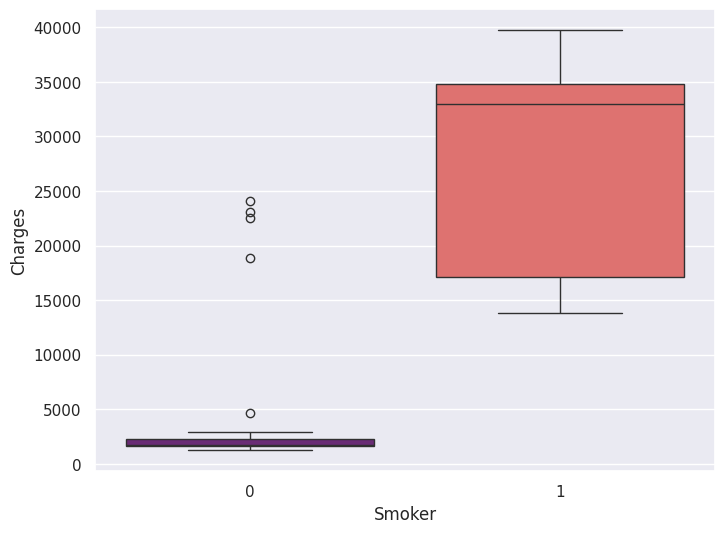

In [70]:
#boxplot for the smokers of age=19
plt.figure(figsize=(8,6))
sns.boxplot(x='smoker',y='charges',data=df[df['age']==19],palette='magma')
plt.xlabel('Smoker')
plt.ylabel('Charges')


Hence, we can see from the above graph that medical expense of smokers of age 19 is very high compared to the non-smokers of that similar age.

<ipython-input-71-9d8b51a3dedd>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['bmi']>25]['charges'])


Text(0.5, 1.0, 'Distribution of Charges for BMI greater than 25')

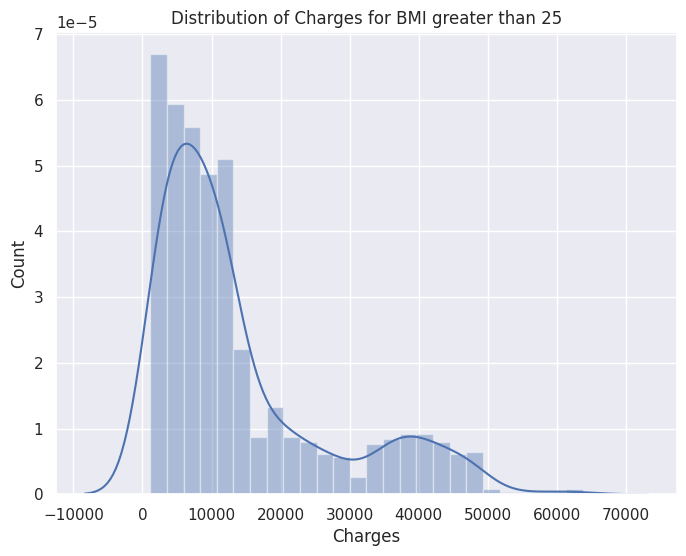

In [71]:
#distribution of charges for tha patients with BMI greater than 25
plt.figure(figsize=(8,6))
sns.distplot(df[df['bmi']>25]['charges'])
plt.xlabel('Charges')
plt.ylabel('Count')
plt.title('Distribution of Charges for BMI greater than 25')

<ipython-input-72-0fcf95f653c7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['bmi']<=25]['charges'])


Text(0.5, 1.0, 'Distribution of Charges for BMI less than or equal to 25')

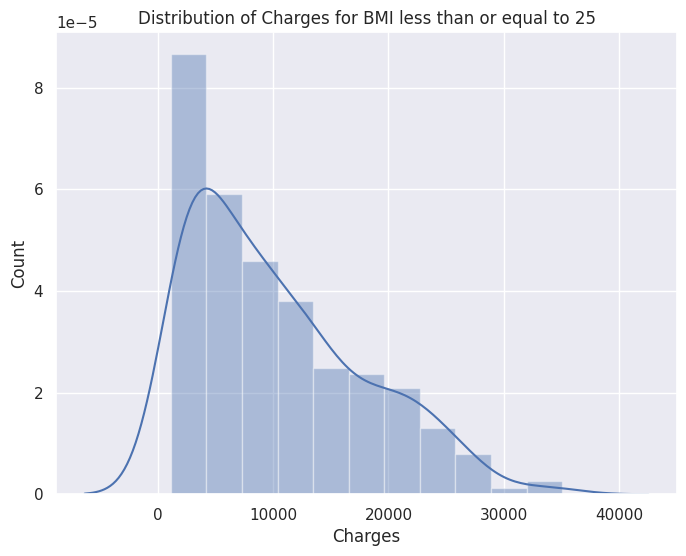

In [72]:
#distribution of charges for tha patients with BMI less or equal than 25
plt.figure(figsize=(8,6))
sns.distplot(df[df['bmi']<=25]['charges'])
plt.xlabel('Charges')
plt.ylabel('Count')
plt.title('Distribution of Charges for BMI less than or equal to 25')


**Observations**:


*  Therefore,Patients with BMI less than or equal to 25 are spending less on medical expenses whereas patients with BMI more than 25 have a higher chance of spending more on medical expenses.



**MODEL** **BUILDING**

In [73]:
#Train-Test Split
from sklearn.model_selection import train_test_split
X=df.drop(columns='charges',axis=1)
Y=df['charges']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

**LINEAR** **REGRESSION**

In [74]:
#training the model
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr

LinearRegression()

In [75]:
lr.fit(X_train,Y_train)

LinearRegression()

In [76]:
#accuracy of the model on the training data
lr.score(X_train,Y_train)

0.7519923667088932

In [77]:
y_pred=lr.predict(X_test)

In [78]:
#calculating the accuracy of the model
print('Mean Absolute Error:', mean_absolute_error(Y_test,y_pred))
print('Mean Squared Error:', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('R2 Score:', r2_score(Y_test,y_pred))

Mean Absolute Error: 4285.2194376337
Mean Squared Error: 38364832.19054552
Root Mean Squared Error: 6193.935113523997
R2 Score: 0.7445422986536503


DECISION TREE REGRESSOR

In [79]:
#decision tree regressor
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()

In [80]:
#model training
dtr.fit(X_train,Y_train)

DecisionTreeRegressor()

In [81]:
#model predict6ion for the test data
dtr_pred=dtr.predict(X_test)

In [82]:
#calculating the accuracy of the predictions
print('Mean Absolute Error:', mean_absolute_error(Y_test,dtr_pred))
print('Mean Squared Error:', mean_squared_error(Y_test,dtr_pred))
print('Root Mean Squared Error"', np.sqrt(mean_squared_error(Y_test,dtr_pred)))
print('R2 Score:', r2_score(Y_test,dtr_pred))

Mean Absolute Error: 2744.256002686567
Mean Squared Error: 38096207.88536497
Root Mean Squared Error" 6172.212559962997
R2 Score: 0.7463309718631761


**RANDOM** **FOREST** **REGRESSOR**

In [83]:
#random forest regressor
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()

In [84]:
#model training
rfr.fit(X_train,Y_train)

RandomForestRegressor()

In [85]:
#model prediction for test data
rfr_pred=rfr.predict(X_test)

In [86]:
#calculating the accuracy of the predictions
print('Mean Absolute Error:', mean_absolute_error(Y_test,rfr_pred))
print('Mean Squared Error:', mean_squared_error(Y_test,rfr_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,rfr_pred)))
print('R2 Score:', r2_score(Y_test,rfr_pred))

Mean Absolute Error: 2721.961976284403
Mean Squared Error: 24518786.38139872
Root Mean Squared Error: 4951.644815755541
R2 Score: 0.8367381674527992


In [87]:
#checking the feature importances
feature_imp=rfr.feature_importances_
feature_imp

array([0.1260523 , 0.0060553 , 0.20624242, 0.01853438, 0.62861585,
       0.01449975])

In [88]:
for i in range(len(feature_imp)):
  print(X.columns[i],feature_imp[i])

age 0.12605229913835586
sex 0.006055301382490886
bmi 0.20624242076992277
children 0.018534377902995506
smoker 0.6286158546533342
region 0.014499746152900686


**Observations**:


*  hence it is confirmed that smoking is the greatest factor that affects medical charges.



**POLYNOMIAL** **REGRESSION**:

*  we will remove region and sex column as the features are not so important.




In [89]:
from sklearn.preprocessing import PolynomialFeatures
X=df.drop(columns=['charges','region','sex'],axis=1)
Y=df['charges']
X_poly=PolynomialFeatures(degree=2).fit_transform(X)
X_train,X_test,Y_train,Y_test=train_test_split(X_poly,Y,test_size=0.2,random_state=2)
poly_reg=LinearRegression()
poly_reg.fit(X_train,Y_train)

LinearRegression()

In [90]:
Y_train_pred=poly_reg.predict(X_train)
Y_test_pred=poly_reg.predict(X_test)

In [91]:
#calculating the accuracy of the prediction
print('Mean Absolute Error:', mean_absolute_error(Y_test,Y_test_pred))
print('Mean Squared Error:', mean_squared_error(Y_test,Y_test_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,Y_test_pred)))
print('R2 Score:', r2_score(Y_test,Y_test_pred))

Mean Absolute Error: 2831.372042533265
Mean Squared Error: 22449890.326034397
Root Mean Squared Error: 4738.131522661058
R2 Score: 0.8505142066129066


**Conclusion**:

*  After Building all the models we can see that Random Forest Regressor and Polynomial Regression are giving the best results.But Polynomial Regression is giving the highest R*2 score and least RMSE. Therefore it is better to use Polynomial Regression to Predict the Medical Expenses of the Patiets.

*  Also from the Data Analysis Part we can conclude that Medical expenses of a Patient depends on their age,BMI and smoking habits.



